## Unit 6 | Assignment - What's the Weather Like?



In [185]:
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy

#import api_key
from config import api_key

In [186]:
# make the API call using owm's get_fourcast_hourly method
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
temp = []
lat = []
hum = []
cloud = []
wind = []

cities = set()
#rand_numbers_lol = {}

number_of_cities = 10
#rand_lat = {}
#rand_lon = {}
count = 0
#random.uniform(-90,90), random.uniform(-180,180)

In [192]:
query_url = f"{url}appid={api_key}&units={units}&q="
while (len(set(cities)) < number_of_cities):
    city = citipy.nearest_city(random.uniform(-90,90), random.uniform(-180,180))
    response = requests.get(query_url + city.city_name).json()
    if response['cod'] == '404':
        #print('Not Found')
        continue
    else:
        prev_number_of_cities = len(cities)
        cities.add(city.city_name)
        if prev_number_of_cities != len(cities):
            temp.append(response['main']['temp'])
            lat.append(response['coord']['lat'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            print(f'-----------------------------\nProcessing Record {len(set(cities))} of Set {number_of_cities} | {city.city_name} {query_url + city.city_name}'
            )


-----------------------------
Processing Record 1 of Set 10 | new norfolk http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=new norfolk
-----------------------------
Processing Record 2 of Set 10 | oyama http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=oyama
-----------------------------
Processing Record 3 of Set 10 | port alfred http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=port alfred
-----------------------------
Processing Record 4 of Set 10 | severo-kurilsk http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=severo-kurilsk
-----------------------------
Processing Record 5 of Set 10 | atuona http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=atuona
-----------------------------
Processing Record 6 of Set 10 | mathbaria

In [193]:
#print(json.dumps(response, indent=4, sort_keys=True))

#len(wind)

len(list(cities))

len(temp)

len(lat)

10

In [201]:
# Build partial query URL

#response = requests.get(query_url + city.city_name).json()
#temp.append(response['main']['temp'])
#lat.append(response['coord']['lat'])
weather_dict = {
    "city": list(cities),
    "temp": temp,
    "lat": lat,
    "hum":hum,
    "cloud":cloud,
    "wind":wind    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather.csv", encoding="utf-8", index=False)
weather_data.head()

,city,cloud,hum,lat,temp,wind
0,kapaa,0,67,-42.78,62.60,11.41
1,new norfolk,0,41,36.31,75.20,14.99
2,hilo,0,100,-33.59,62.14,5.50
3,mathbaria,0,97,50.68,34.69,3.78
4,castro,64,100,-9.80,81.49,18.10


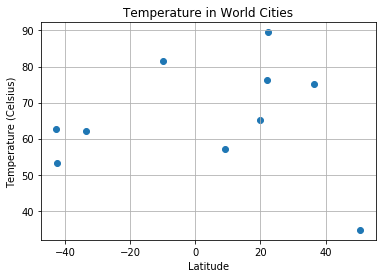

In [200]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

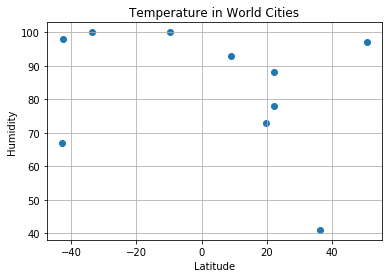

In [196]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["hum"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

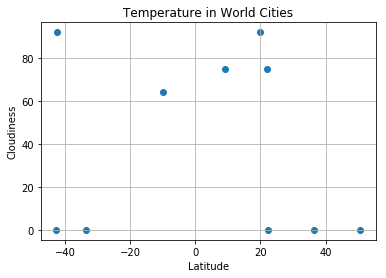

In [197]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

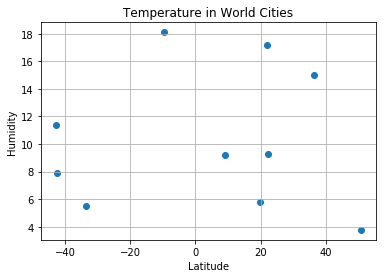

In [198]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()